In [1]:
setwd('~/ResearchProjects/scRNA_simulation/')
library("devtools")
load_all("SymSim/")

library('plyr')
library('easyGgplot2')
source('SymSim/ContinuousTree.R')

Warning message:
“package ‘devtools’ was built under R version 3.4.2”Loading SymSim
Loading required package: ggplot2
Loading required package: Rtsne
Loading required package: RColorBrewer
Loading required package: fOptions
Warning message:
“package ‘fOptions’ was built under R version 3.4.2”Loading required package: timeDate
Warning message:
“package ‘timeDate’ was built under R version 3.4.2”Loading required package: timeSeries
Warning message:
“package ‘timeSeries’ was built under R version 3.4.2”Loading required package: fBasics
Warning message:
“package ‘fBasics’ was built under R version 3.4.2”Loading required package: labeling
Loading required package: FNN
Loading required package: reshape
Loading required package: gridExtra
Loading required package: Biobase
Warning message:
“package ‘Biobase’ was built under R version 3.4.2”Loading required package: BiocGenerics
Warning message:
“package ‘BiocGenerics’ was built under R version 3.4.2”Loading required package: parallel

Attachin

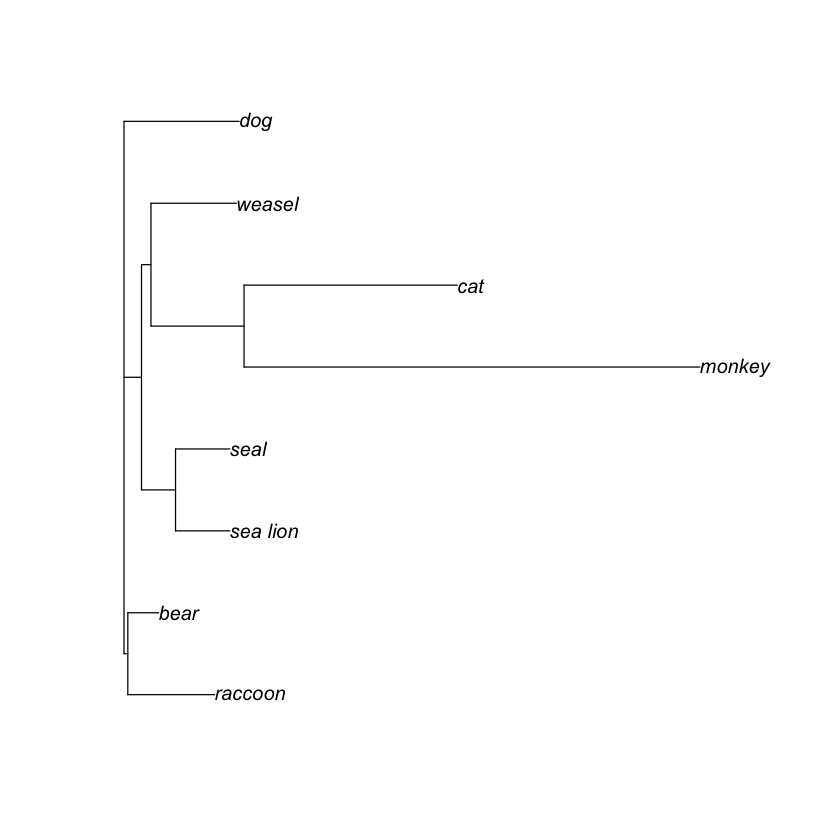

In [79]:
phyla <- read.tree('newwick.txt')
plot(phyla)

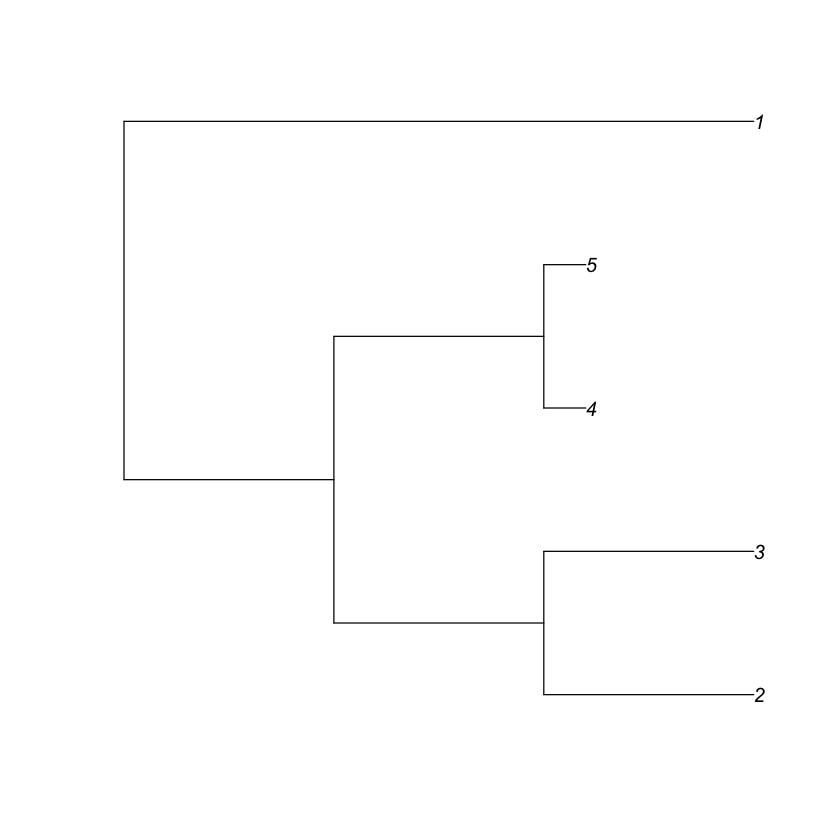

In [2]:
phyla <- Phyla5()
plot(phyla)

In [3]:
set.seed(2)
ncells <- 500
ngenes <- 1000

In [4]:
true_count <- SimulateTrueCounts(
    ncells_total=ncells,min_popsize=20,
    ngenes=ngenes,nevf=50,percent_DEevf=0.2,Sigma=0.1,
    phyla=phyla,
    param_realdata="zeisel.imputed",
    bimod=0,
    gene_effects_sd=1,gene_effect_prob=0.3,
    evf_type='discrete',randseed=0)
true_counts <- true_count[[1]]
GE <- true_count[[2]]
meta <- true_count[[3]]
params <- true_count[[4]]


In [47]:
length(GE)
head(GE[[1]])

[1] 3

0.9640174,0.0000000,0,0.0000000,0.0000000,0.0000000,0.42418737,0.00000000,0.0000000,0.0000000,⋯,0.62229564,0.5579534,0.000000,1.0165573,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000
0.0000000,1.1813373,0,-0.7124811,0.0000000,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,⋯,0.00000000,0.0000000,1.773487,0.0000000,-0.7685754,0.0000000,0.0000000,0.000000,0.000000,-0.5260700
0.0000000,1.0082203,0,-0.4293676,-1.1718929,0.0000000,-0.01904348,-0.04111857,0.0000000,-0.2947351,⋯,0.00000000,0.2408145,0.000000,0.0000000,0.0000000,0.2274805,0.9324006,0.000000,0.000000,0.0000000
0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0.00000000,0.00000000,-0.3144327,0.0000000,⋯,0.00000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,2.079923,1.212797,0.0000000
1.0130337,-0.4980928,0,0.0000000,0.4834965,0.5341113,0.00000000,0.00000000,0.0000000,-0.5414671,⋯,0.08699446,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,1.1047228,0.000000,0.000000,0.1746486
1.3895441,0.0000000,0,0.0000000,0.0000000,-0.7374363,0.00000000,0.00000000,0.0000000,0.0000000,⋯,0.00000000,0.0000000,0.000000,0.3868056,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000


In [48]:
length(params)
dim(params[[1]])
head(params[[1]])

[1] 3

[1] 1000  500

2.7465730,2.3166961,2.6090759,3.0477404,2.8697135,2.864151,2.6369005,2.6210804,2.630585,2.7306332,⋯,7.1884983,5.939426,4.7816539,6.0458216,7.4040990,5.2131191,5.562906,6.1455075,4.544171,5.131839
30.0804152,37.3487042,29.9799348,34.5400170,23.9528772,37.699025,43.1541556,27.5939065,33.048113,28.2466079,⋯,4.5141977,5.000036,4.6319245,4.8864618,4.6755712,4.0606166,4.495252,4.1824243,6.139170,4.367698
0.4769946,0.4082487,0.4314796,0.5245199,0.3942451,0.472572,0.4098375,0.4849699,0.514460,0.3789182,⋯,0.9909374,1.076358,0.9793176,0.8228374,0.8690991,0.9397357,1.221841,0.9886063,1.169526,1.062466
1.8789461,2.0022820,2.2459650,2.4570440,2.3708412,1.943548,2.0690025,2.3075218,2.107445,2.2759533,⋯,3.9532903,3.433221,2.9380915,4.1351084,4.0307662,2.5910397,3.434229,2.8947060,3.607260,2.982011
3.4969475,3.1672637,3.1387600,2.9971049,2.6868391,3.761322,2.6228530,3.1571563,2.847867,3.4893512,⋯,3.7513346,3.165524,3.3055471,4.0376580,3.9958759,5.0557853,3.950617,4.2633431,3.646504,4.035643
7.5564110,7.5819861,7.9718725,8.7694480,12.0758070,6.987350,8.3475905,6.9179166,7.834133,6.5437666,⋯,14.7783934,10.245535,11.3562901,16.4813932,12.6036171,11.1266688,8.901516,13.5297652,11.857521,13.039459


In [49]:
dim(meta)
head(meta)

[1] 500 152

cellid,pop,kon_nonDE_evf1,kon_nonDE_evf2,kon_nonDE_evf3,kon_nonDE_evf4,kon_nonDE_evf5,kon_nonDE_evf6,kon_nonDE_evf7,kon_nonDE_evf8,⋯,s_DE_evf41,s_DE_evf42,s_DE_evf43,s_DE_evf44,s_DE_evf45,s_DE_evf46,s_DE_evf47,s_DE_evf48,s_DE_evf49,s_DE_evf50
cell_1,1,1.0027502,0.9641084,0.8024424,0.9938803,0.9958316,1.1329096,1.0176890,1.0647385,⋯,0.5408583,0.6102820,-0.6583598,0.8680240,0.3990117,-0.2560515,0.4131219,-0.1782873,0.3292975,0.5723552
cell_2,1,0.8649035,0.9922574,0.9459880,1.1327877,0.9943445,1.0849416,0.8937796,1.1325138,⋯,0.4289174,0.7443121,-0.6415339,0.9209375,0.6636708,-0.1997890,0.3128589,-0.3806006,0.4293674,0.5203739
cell_3,1,0.9712531,0.8170864,1.1228111,0.9586957,1.0239242,0.9218550,0.9004778,1.2945833,⋯,0.3078808,0.5432117,-0.4687062,0.9947942,0.4537134,-0.2895876,0.3364483,-0.3997865,0.3871109,0.4217665
cell_4,1,0.9728512,1.0363078,1.0864925,1.1073855,0.9968903,0.8430320,1.0755037,1.0091858,⋯,0.4364690,0.6867919,-0.6250030,0.9227079,0.4920713,-0.4333045,0.3303785,-0.4696634,0.4087626,0.3610488
cell_5,1,1.0770536,0.8967505,0.7453817,0.9545371,0.9837159,0.8388246,1.0370254,0.9785075,⋯,0.3815164,0.6405516,-0.6811963,0.8897441,0.6128566,-0.1870146,0.2787885,-0.2922347,0.4620039,0.4726046
cell_6,1,0.9410877,1.1122191,1.0080768,1.1646485,1.0600791,1.1809035,0.9808776,0.9986688,⋯,0.2793050,0.4936704,-0.7566687,0.8257573,0.6114714,-0.4919098,0.3677732,-0.2367602,0.4305595,0.4764626


In [50]:
dim(true_counts)
head(true_counts)

[1] 1000  500

5,5,13,5,9,1,15,6,7,2,⋯,1,6,7,5,6,7,6,7,5,7
298,231,300,257,289,244,270,307,239,227,⋯,66,227,139,117,120,114,100,182,125,147
33,0,30,4,155,15,1,56,93,76,⋯,11,64,4,25,36,52,64,57,71,21
52,103,58,54,67,107,32,77,64,83,⋯,115,127,130,110,126,124,144,100,102,135
10,15,19,19,5,13,11,7,11,16,⋯,29,22,29,11,23,9,35,27,20,15
52,86,110,98,124,114,97,127,86,109,⋯,29,19,27,31,27,27,17,23,19,46


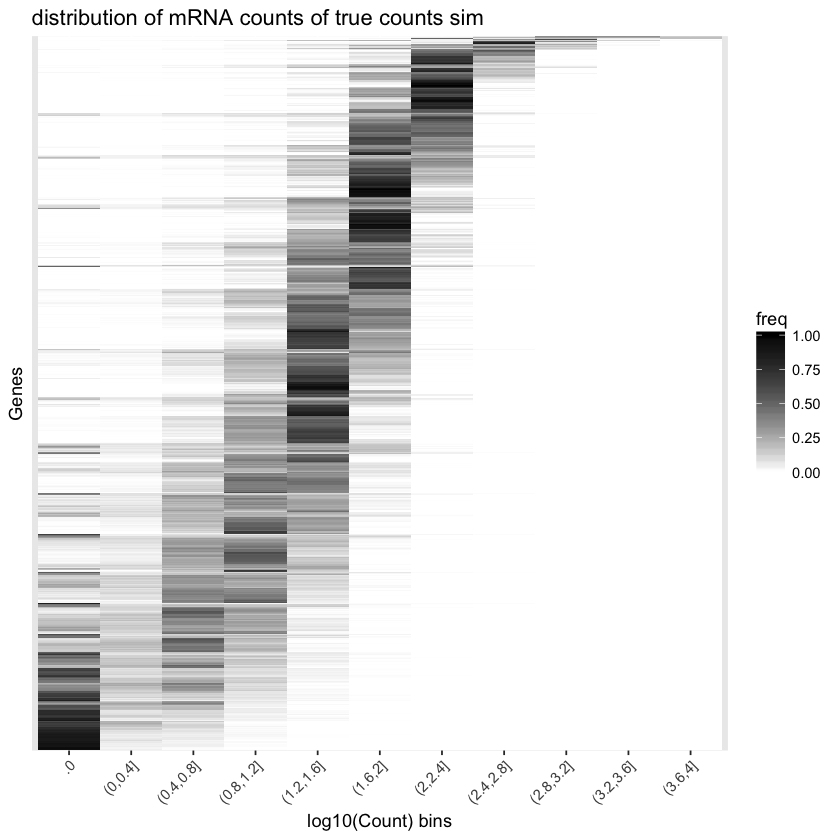

In [51]:
p=PlotCountHeatmap(LogDist(true_counts,seq(0, 4, 0.4)),rowMeans(true_counts),
                 NA,1, data_name = "true counts sim")
p[[2]]

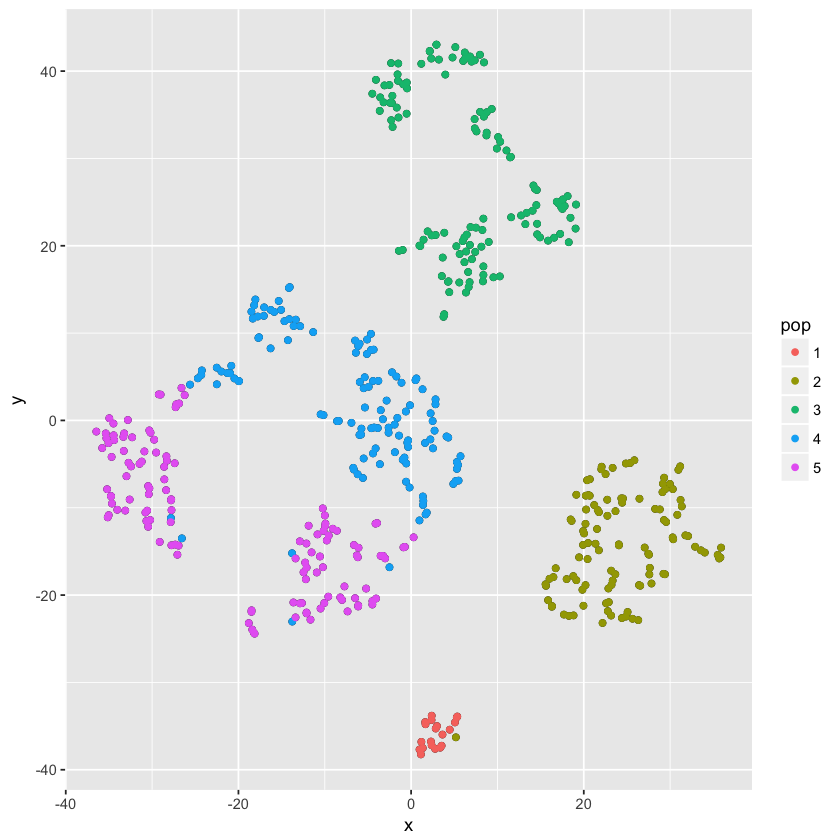

In [52]:
tsne_true <- PlotTsne(true_count[[3]],true_count[[1]][,],'sim','pop',evf_type="discrete",saving=F,perplexity=10)
tsne_true[[2]]

In [53]:
load("SymSim/gene_len_pool.RData")
gene_len <- sample(gene_len_pool[which(gene_len_pool>100)], ngenes, replace = FALSE)
observed_counts <- True2ObservedCounts(
    true_counts=true_count[[1]],
    meta_cell=true_count[[3]],
    nbatch=1,protocol='10x',
    alpha_mean=0.01,alpha_sd=0.005,
    lenslope=0.01,nbins=20,gene_len=gene_len,
    amp_bias_limit=c(-0.2, 0.2),
    rate_2PCR=0.8,nPCR=16,depth_mean=5e3, depth_sd=1e3) 


In [ ]:
length(observed_counts)

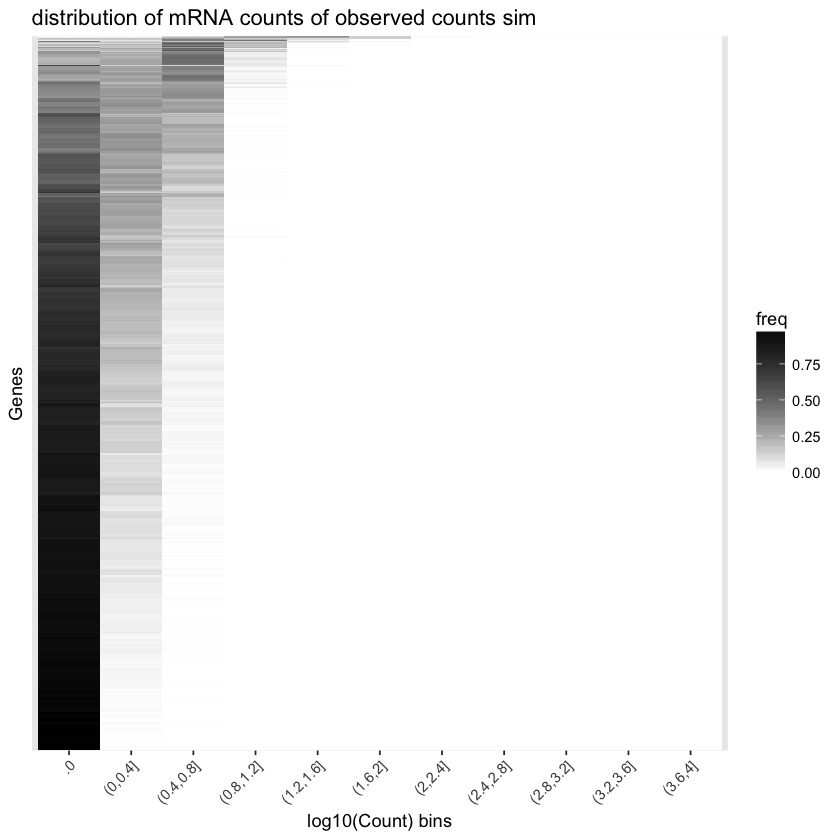

In [54]:
p=PlotCountHeatmap(LogDist(observed_counts[[1]],seq(0, 4, 0.4)),rowMeans(true_counts),
                 NA,1, data_name = "observed counts sim")
p[[2]]

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

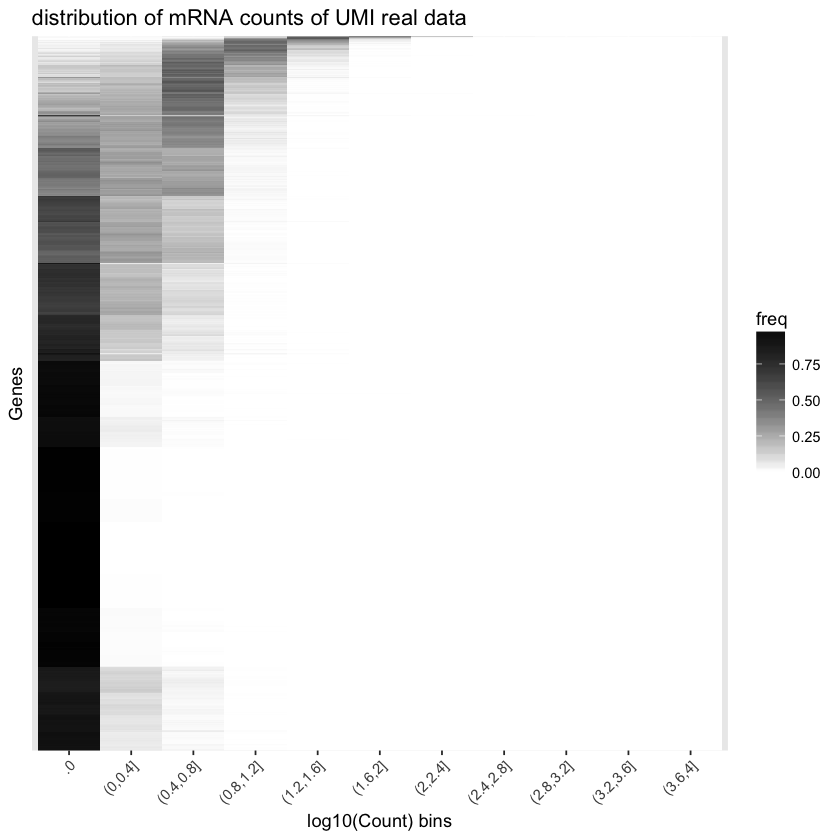

In [55]:
load('ExperimentalData/expression_mRNA_17-Aug-2014.robj')
pop3 <- as.numeric(meta[1,])==3
Cortex_counts <- counts[,pop3 & !is.na(pop3)]
p=PlotCountHeatmap(LogDist(Cortex_counts,seq(0, 4, 0.4)),rowMeans(Cortex_counts),
                 NA,1, data_name = "UMI real data")
p[[2]]

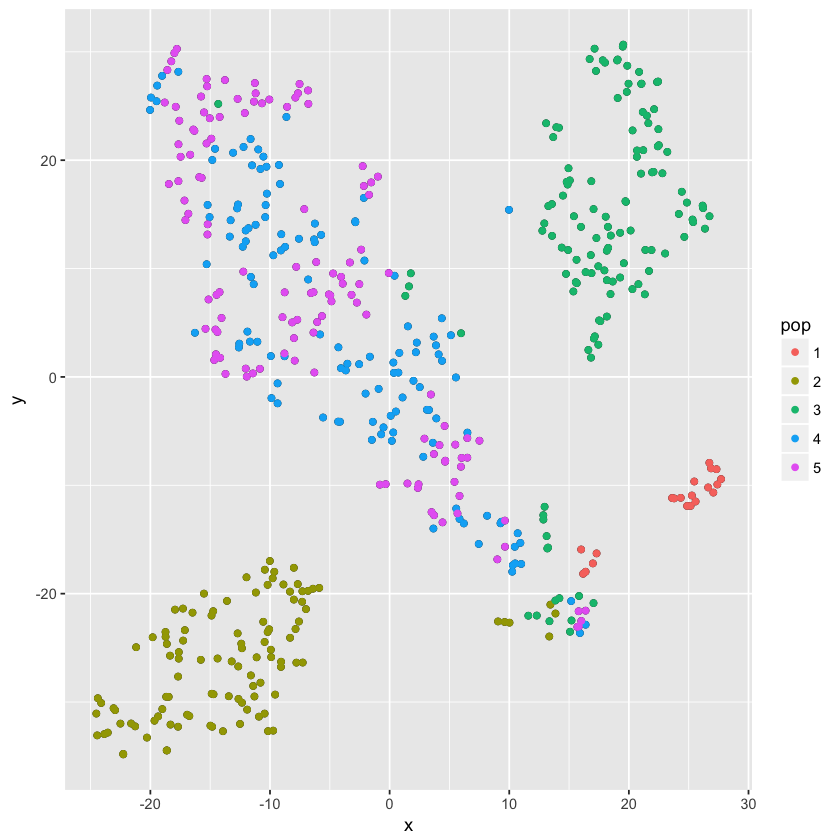

In [56]:
tsne_true <- PlotTsne(true_count[[3]],observed_counts[[1]][,],'sim','pop',evf_type="discrete",saving=F,perplexity=10)
tsne_true[[2]]

In [57]:
observed_counts <- True2ObservedCounts(
    true_counts=true_count[[1]],
    meta_cell=true_count[[3]],
    nbatch=1,protocol='ss2',
    alpha_mean=0.1,alpha_sd=0.05,
    lenslope=0.01,nbins=20,gene_len=gene_len,
    amp_bias_limit=c(-0.2, 0.2),
    depth_mean=208683, depth_sd=114448) 


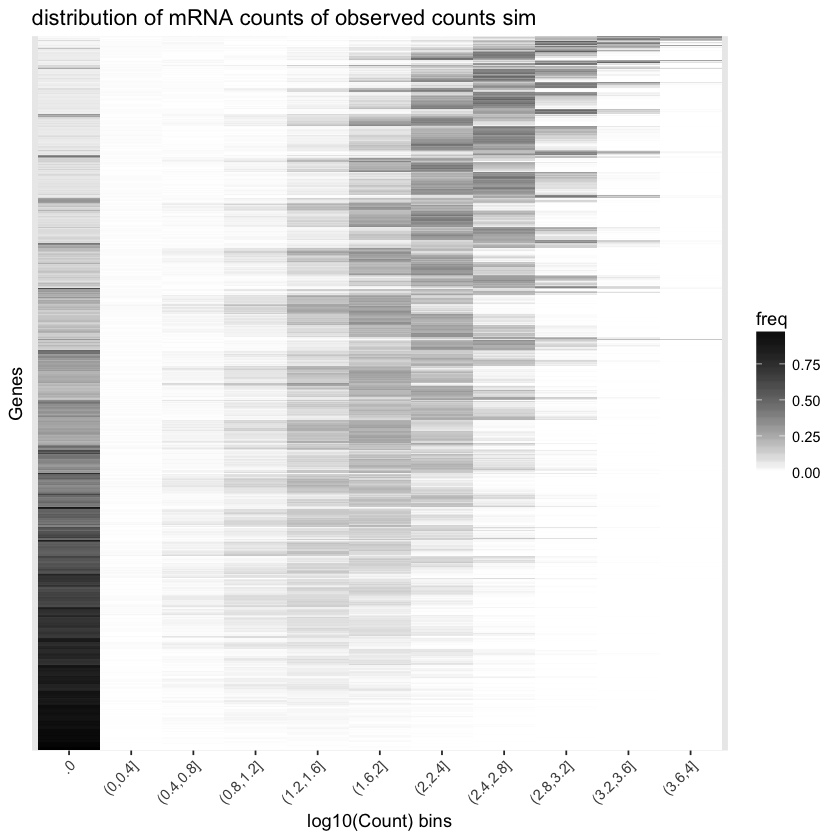

In [58]:
p=PlotCountHeatmap(LogDist(observed_counts[[1]],seq(0, 4, 0.4)),rowMeans(true_counts),
                 NA,1, data_name = "observed counts sim")
p[[2]]

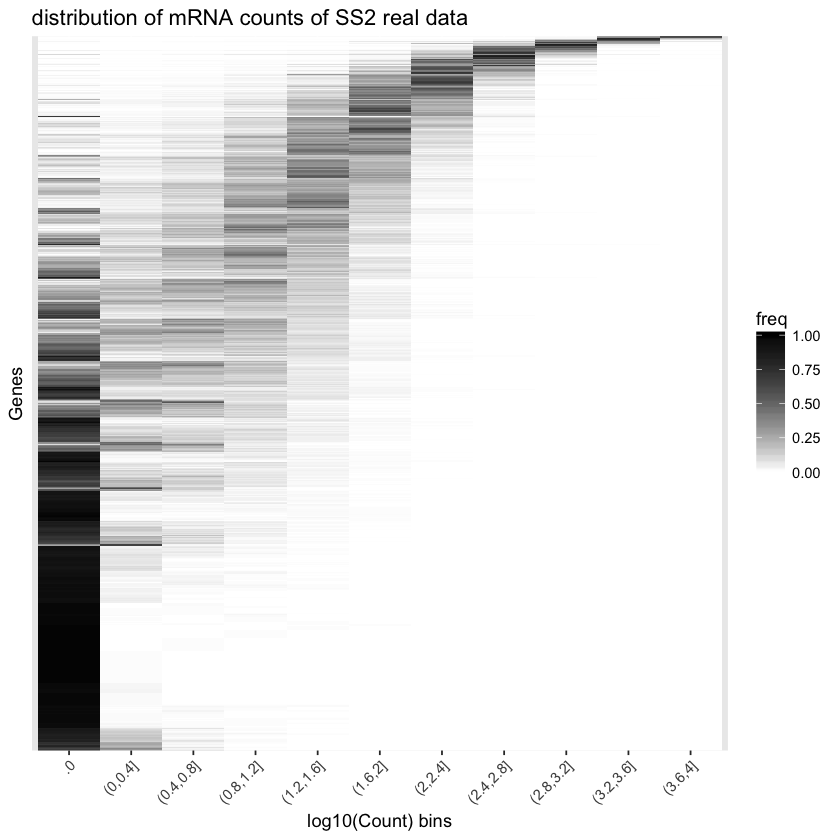

In [59]:
load('ExperimentalData/130cells.raw.counts.robj')
Tcells_counts <- counts
p=PlotCountHeatmap(LogDist(Tcells_counts,seq(0, 4, 0.4)),rowMeans(Tcells_counts),
                 NA,1, data_name = "SS2 real data")
p[[2]]

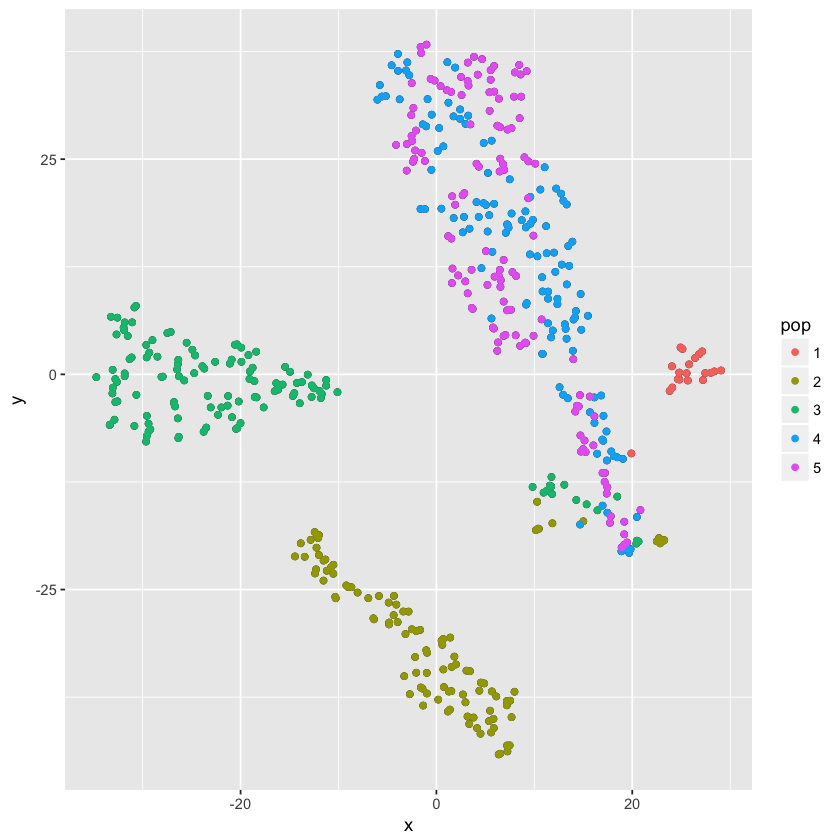

In [60]:
tsne_true <- PlotTsne(true_count[[3]],observed_counts[[1]][,],'sim','pop',evf_type="discrete",saving=F,perplexity=10)
tsne_true[[2]]

In [11]:
check_params=F
pop1=4
pop2=5
true_counts <- true_count[[1]]
GE <- true_count[[2]]
meta <- true_count[[3]]
params <- true_count[[4]]
temp <- colnames(meta)
head(meta)
DE_evfs <- lapply(c('kon','koff','s'),function(i){
    k <- c(1:length(temp))[grep(i,temp)]
    nonDE <- k[grep('nonDE',temp[k])]
    DE <- k[!k%in%nonDE]
    DE <- DE+1-min(k)
    return(DE)
})
DE_evfs


cellid,pop,kon_nonDE_evf1,kon_nonDE_evf2,kon_nonDE_evf3,kon_nonDE_evf4,kon_nonDE_evf5,kon_nonDE_evf6,kon_nonDE_evf7,kon_nonDE_evf8,⋯,s_DE_evf41,s_DE_evf42,s_DE_evf43,s_DE_evf44,s_DE_evf45,s_DE_evf46,s_DE_evf47,s_DE_evf48,s_DE_evf49,s_DE_evf50
cell_1,1,1.0027502,0.9641084,0.8024424,0.9938803,0.9958316,1.1329096,1.0176890,1.0647385,⋯,0.5408583,0.6102820,-0.6583598,0.8680240,0.3990117,-0.2560515,0.4131219,-0.1782873,0.3292975,0.5723552
cell_2,1,0.8649035,0.9922574,0.9459880,1.1327877,0.9943445,1.0849416,0.8937796,1.1325138,⋯,0.4289174,0.7443121,-0.6415339,0.9209375,0.6636708,-0.1997890,0.3128589,-0.3806006,0.4293674,0.5203739
cell_3,1,0.9712531,0.8170864,1.1228111,0.9586957,1.0239242,0.9218550,0.9004778,1.2945833,⋯,0.3078808,0.5432117,-0.4687062,0.9947942,0.4537134,-0.2895876,0.3364483,-0.3997865,0.3871109,0.4217665
cell_4,1,0.9728512,1.0363078,1.0864925,1.1073855,0.9968903,0.8430320,1.0755037,1.0091858,⋯,0.4364690,0.6867919,-0.6250030,0.9227079,0.4920713,-0.4333045,0.3303785,-0.4696634,0.4087626,0.3610488
cell_5,1,1.0770536,0.8967505,0.7453817,0.9545371,0.9837159,0.8388246,1.0370254,0.9785075,⋯,0.3815164,0.6405516,-0.6811963,0.8897441,0.6128566,-0.1870146,0.2787885,-0.2922347,0.4620039,0.4726046
cell_6,1,0.9410877,1.1122191,1.0080768,1.1646485,1.0600791,1.1809035,0.9808776,0.9986688,⋯,0.2793050,0.4936704,-0.7566687,0.8257573,0.6114714,-0.4919098,0.3677732,-0.2367602,0.4305595,0.4764626


[[1]]
 [1] 41 42 43 44 45 46 47 48 49 50

[[2]]
 [1] 41 42 43 44 45 46 47 48 49 50

[[3]]
 [1] 41 42 43 44 45 46 47 48 49 50

In [12]:

nonDEgenes <- lapply(c(1:3),function(parami){
    id <- rowSums(GE[[parami]][,DE_evfs[[parami]]]!=0) ==0
    if(check_params ==T){
        de_genes <- params[[parami]][id,]				
    }else{de_genes <- true_counts[id,]}
    return(de_genes)
})

DEgenes <- lapply(c(1:3),function(parami){
    id <- rowSums(GE[[parami]][,DE_evfs[[parami]]]!=0) >= floor(length(DE_evfs[[parami]])/2)
    if(check_params ==T){
        de_genes <- params[[parami]][id,]				
    }else{de_genes <- true_counts[id,]}
    return(de_genes)
})

DE_GE <- lapply(c(0:min(sapply(DE_evfs,length))),function(k){
    lapply(c(1:3),function(parami){
        id <- rowSums(GE[[parami]][,DE_evfs[[parami]]]!=0) ==k
        if(check_params ==T){
            de_genes <- params[[parami]][id,]				
        }else{de_genes <- true_counts[id,]}
        return(de_genes)
    })
})


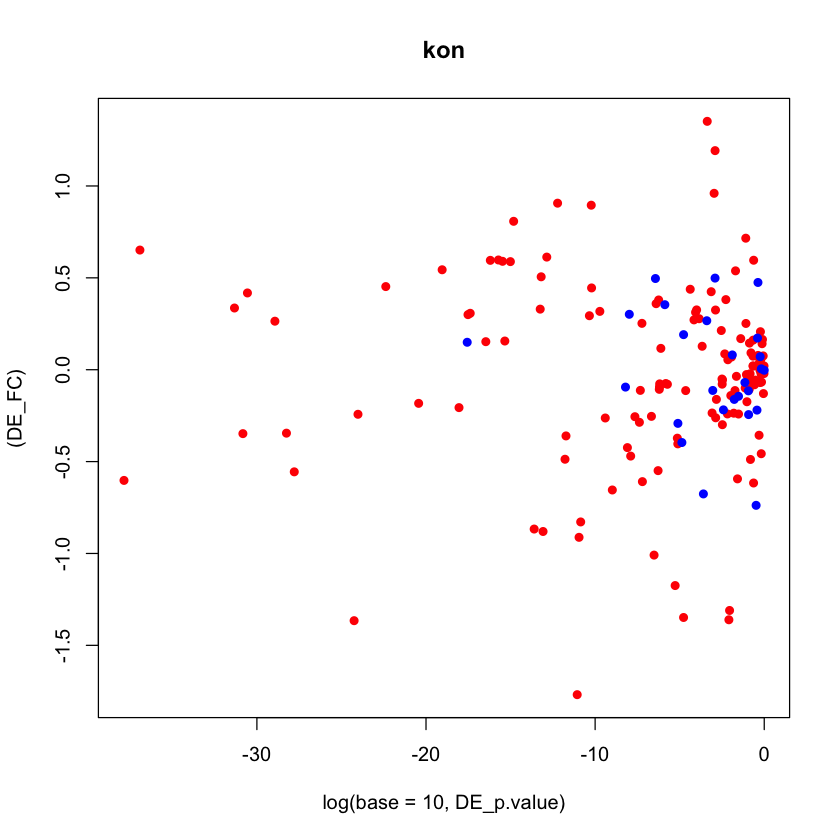

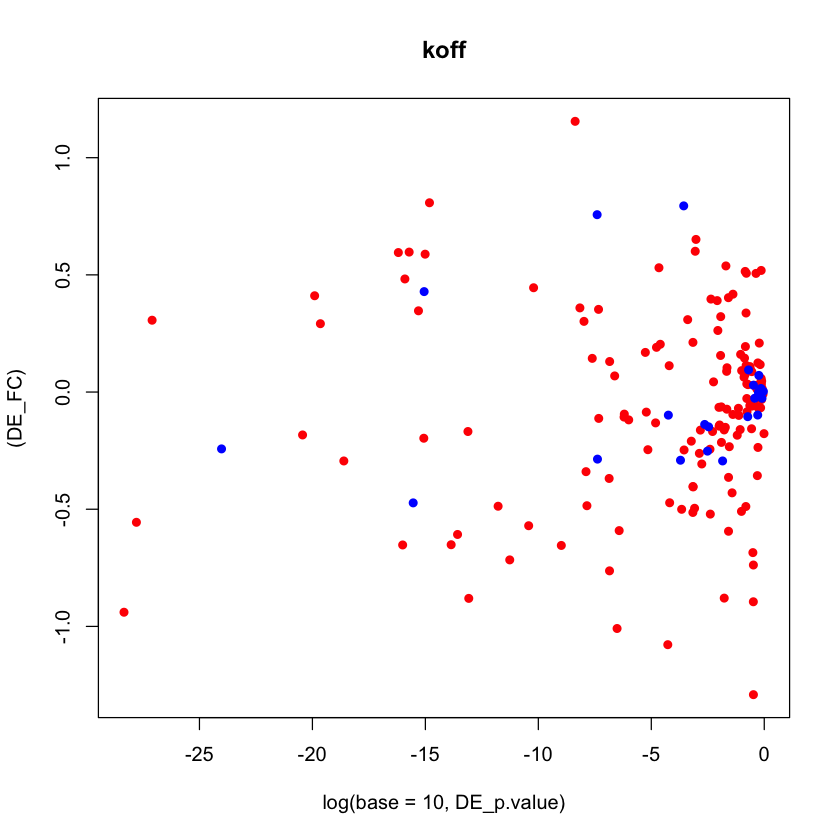

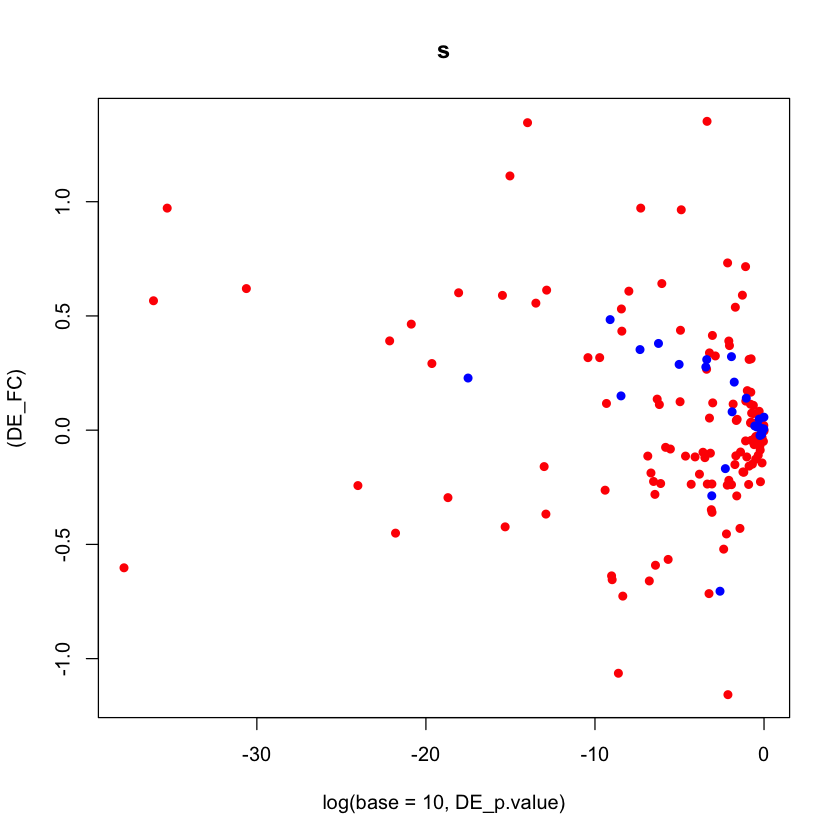

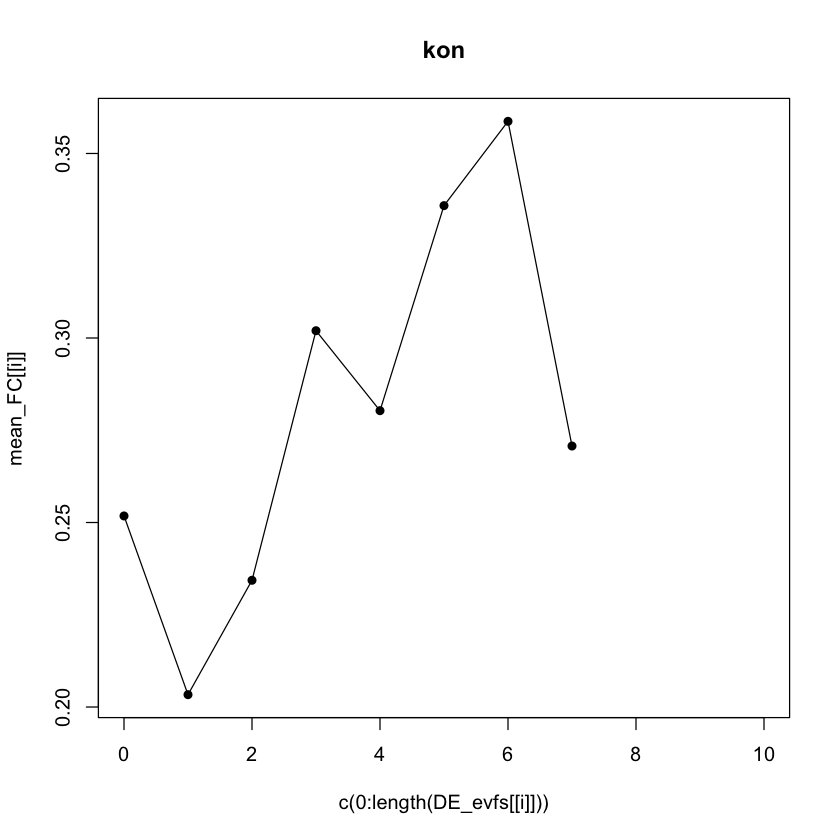

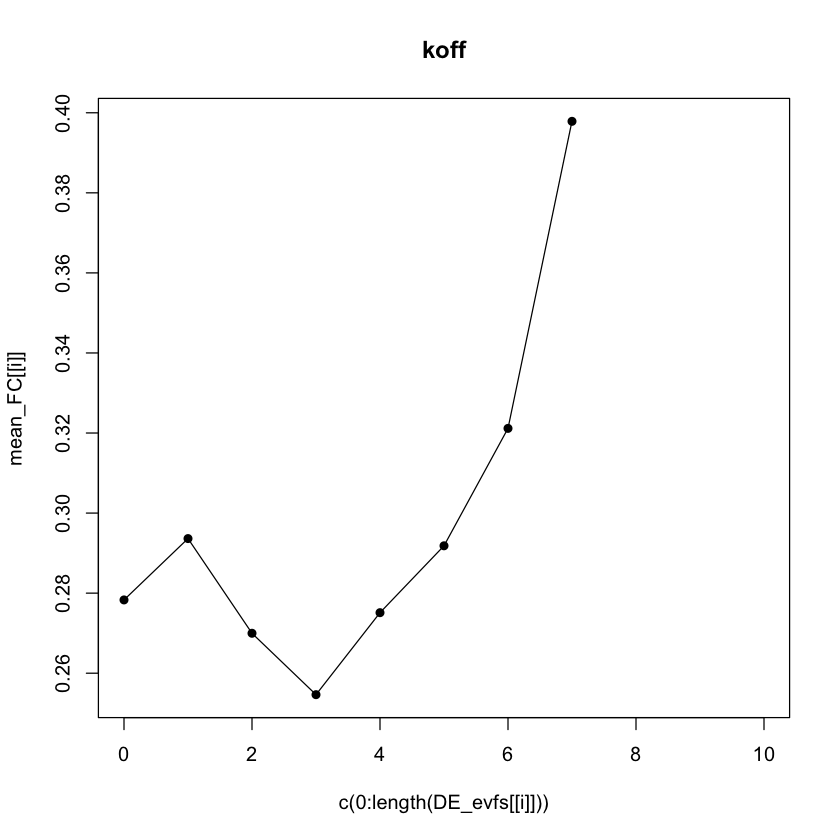

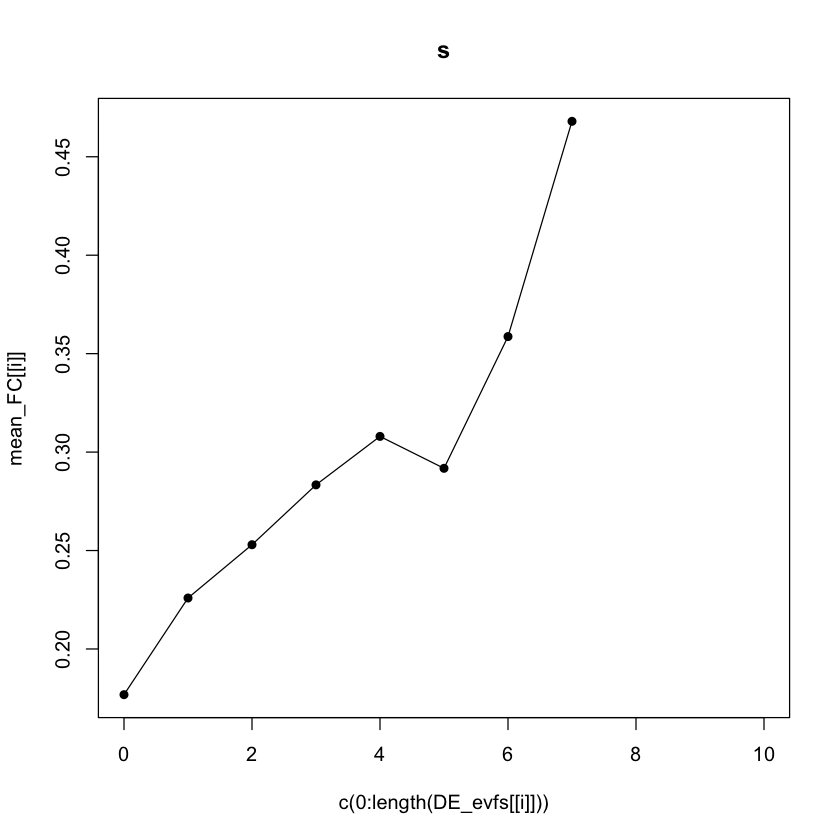

In [13]:
mean_FC <- lapply(c(1:3),function(parami){
    FC <- sapply(DE_GE,function(X){
        if(is.null(X[[parami]])){return(NA)
        }else if(length(dim(X[[parami]]))==0){return(NA)
        }else{
            FC <- log(rowMeans(X[[parami]][,meta[,2]==pop1])/rowMeans(X[[parami]][,meta[,2]==pop2]))
            return(FC)				
        }
    })
    mean_FC <- sapply(FC,function(X){mean(abs(X[is.finite(X)]))})
    return(mean_FC)
})

for( parami in c(1:3)){
    nonDE_FC <- log(rowMeans(nonDEgenes[[parami]][,meta[,2]==pop1])/rowMeans(nonDEgenes[[parami]][,meta[,2]==pop2]))
    # nonDE_mean <- rowMeans(nonDEgenes[[parami]])
    nonDE_p.value <- sapply(c(1:length(nonDEgenes[[parami]][,1])),function(i){
    wilcox.test(nonDEgenes[[parami]][i,meta[,2]==pop1],nonDEgenes[[parami]][i,meta[,2]==pop2])$p.value
    })
    DE_FC <- log(rowMeans(DEgenes[[parami]][,meta[,2]==pop1])/rowMeans(DEgenes[[parami]][,meta[,2]==pop2]))
    # DE_mean <- rowMeans(DEgenes[[parami]])
    DE_p.value <- sapply(c(1:length(DEgenes[[parami]][,1])),function(i){
    wilcox.test(DEgenes[[parami]][i,meta[,2]==pop1],DEgenes[[parami]][i,meta[,2]==pop2])$p.value
    })	
    plot(x=log(base=10,DE_p.value),y=(DE_FC),pch=16,col='red',main=c('kon','koff','s')[parami])
    points(x=log(base=10,nonDE_p.value),y=(nonDE_FC),pch=16,col='blue')
}
for(i in c(1:3)){
    plot(mean_FC[[i]],x=c(0:length(DE_evfs[[i]])),pch=16,type='o',main=c('kon','koff','s')[i])
}
